### Gęste kodowanie

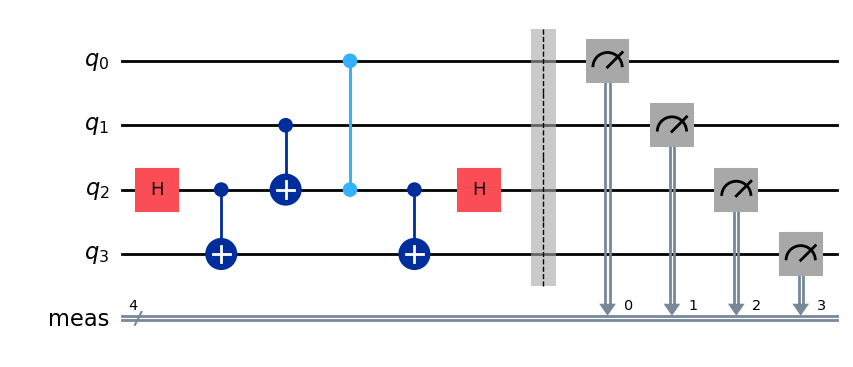

In [2]:
import warnings
warnings.filterwarnings("ignore")
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_ibm_runtime import QiskitRuntimeService

qc= QuantumCircuit(4)
qc.h(2)
qc.cx(2, 3)
qc.cx(1, 2)
qc.cz(0, 2)
qc.cx(2, 3)
qc.h(2)

qc.measure_all()
qc.draw('mpl')

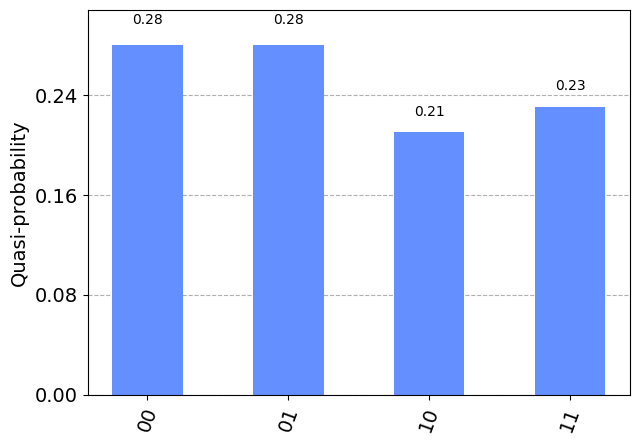

In [11]:
from qiskit.visualization import plot_histogram
service = QiskitRuntimeService()
backend=service.backend('ibmq_qasm_simulator')
from qiskit_ibm_runtime import  Batch, Sampler
with Batch(service=service, backend=backend):
    sampler = Sampler()
    job = sampler.run(
        circuits=[qc],
        shots=100,
    )
    result_sim = job.result()
plot_histogram(result_sim.quasi_dists[0].binary_probabilities())

### Teleportacja kwantowa

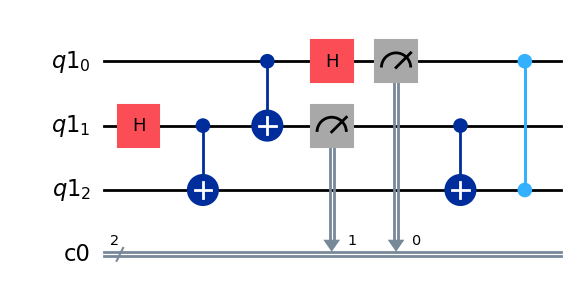

In [9]:
qc= QuantumCircuit(QuantumRegister(3), ClassicalRegister(2))
qc.h(1)
qc.cx(1, 2)
qc.cx(0, 1)
qc.h(0)
qc.measure(0, 0)
qc.measure(1, 1)
qc.cx(1, 2)
qc.cz(0, 2)
qc.draw('mpl')

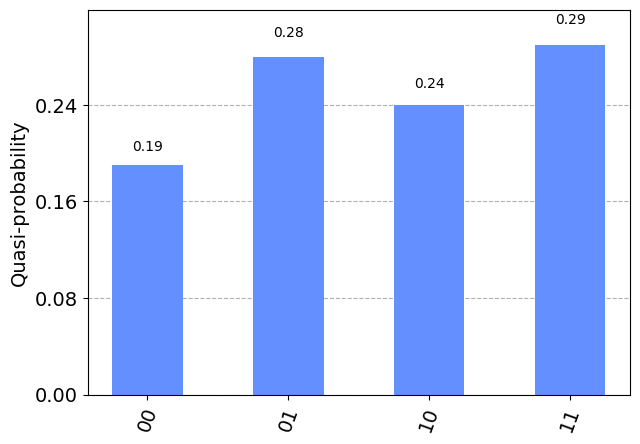

In [10]:
with Batch(service=service, backend=backend):
    sampler = Sampler()
    job = sampler.run(
        circuits=[qc],
        shots=100,
    )
    result_sim = job.result()
plot_histogram(result_sim.quasi_dists[0].binary_probabilities())